# Beta Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Farbod Khodadadi Aski

*SID:* 810102545

The objective of this notebook is to estimate the probability of getting tails in a coin flip using a Bayesian approach.



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import Union
from scipy.special import betaln
np.random.seed(545)

In [19]:
class BetaDistribution:
    """
    Represents a beta distribution with the given shape parameters.
    """

    def __init__(self, alpha: float, beta: float):
        """
        Args:
            alpha (float): The first shape parameter of the beta distribution.
            beta (float): The second shape parameter of the beta distribution.
        """

        ######################  TODO  ########################
        self.alpha = alpha
        self.beta = beta
        ######################  TODO  ########################

    def pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the normalized probability density function (PDF) of the beta distribution at the given input value(s).
        Args:
            x (float or np.ndarray): The input value(s) to evaluate the beta distribution PDF at.
        Returns:
            pdf (float or np.ndarray): The normalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        #I used log form of beta distribution becuase of large numerical calculation(اگه تقلب نمیگیرید یه کامنت بزاریم)
        #the code below is the normal from of beta distribution

        #beta_coeffecient = math.gamma(self.alpha +self.beta)/(math.gamma(self.alpha)*math.gamma(self.beta))
        #pdf = (((x)**(self.alpha -1)) * ((1-x)**(self.beta - 1)))/beta_coeffecient
        #return pdf
        
        log_pdf = (self.alpha - 1) * np.log(x) + (self.beta - 1) * np.log(1 - x) - betaln(self.alpha, self.beta)
        return np.exp(log_pdf)
        
        ######################  TODO  ########################

    def __unnormalized_pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the unnormalized probability density function (PDF) of the beta distribution at the given input value(s).

        Args:
            x (float or np.ndarray): The input value(s) to evaluate the unnormalized beta distribution PDF at.

        Returns:
            pdf (float or np.ndarray): The unnormalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        pdf_unnormalized= (((x)**(self.alpha -1)) * ((1-x)**(self.beta - 1)))
        return pdf_unnormalized
        ######################  TODO  ########################

    def __calculate_normalization_constant(self):
        """
        Calculates the normalization constant for the beta distribution.
        This constant is used to ensure that the total probability under the PDF is 1.
        """
        ######################  TODO  ########################
        # Proceed with the numerical approach
        beta_coeffecient = math.gamma(self.alpha +self.beta)/(math.gamma(self.alpha)*math.gamma(self.beta))
        return beta_coeffecient
        ######################  TODO  ########################

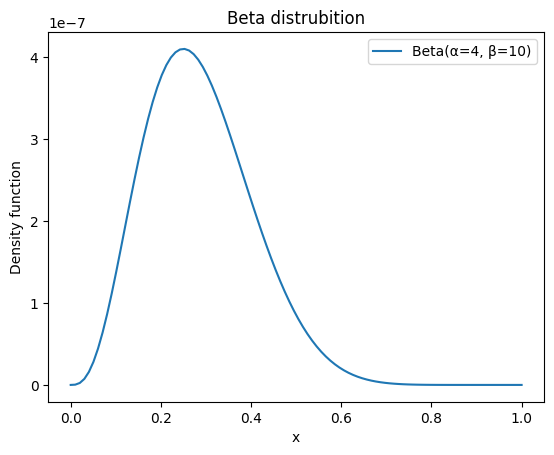

In [8]:
def plot_beta_dist(beta: BetaDistribution):
    """
    Plots the probability density function of the given beta distribution.

    Args:
        beta (BetaDistribution): The beta distribution instance to plot.
    """
    ######################  TODO  ########################
    # Do not forget to add title, labels, and legend.
    x=np.linspace(0,1,100)
    y=beta.pdf(x)
    plt.plot(x,y ,label=f'Beta(α={beta.alpha}, β={beta.beta})')
    plt.xlabel("x")
    plt.ylabel("Density function")
    plt.title("Beta distrubition")
    plt.legend()
    plt.show()
    ######################  TODO  ########################
plot_beta_dist(BetaDistribution(4,10))

Read the `coint_flips.txt` file and plot the posterior distributions after every 50 trials for two prior probabilities:
1. Uniform distribution 
2. $Beta (4, 10)$

In [9]:
######################  TODO  ########################
# Read coin_flips.txt
with open("data/coin_flips.txt", "r") as file:
    data = [line.strip() for line in file]
######################  TODO  ########################

## Prior: Uniform

For our initial distribution we use uniform since the probabilty of heads and tails are the same(alpha = beta =1)
we read from the file and add the number of heads to alpha and use the sum of number of tails and initial beta for our beta:

updated_alpha =initial_alpha + number_heads

updated_beta =initial_beta +number_tails

As we expect no matter if we use initial Beta(1,1) or Beta(4,10) the posterior distribution will be the same since we updade our distribution after each observation

**Hint:** use `plt.figure(figsize=(25, 20))` and `plt.subplot(4, 5, ...)`

C:\Users\L O Q\AppData\Local\Temp\ipykernel_7096\4006837094.py:30: RuntimeWarning: divide by zero encountered in log
  log_pdf = (self.alpha - 1) * np.log(x) + (self.beta - 1) * np.log(1 - x) - betaln(self.alpha, self.beta)
C:\Users\L O Q\AppData\Local\Temp\ipykernel_7096\4006837094.py:30: RuntimeWarning: invalid value encountered in multiply
  log_pdf = (self.alpha - 1) * np.log(x) + (self.beta - 1) * np.log(1 - x) - betaln(self.alpha, self.beta)


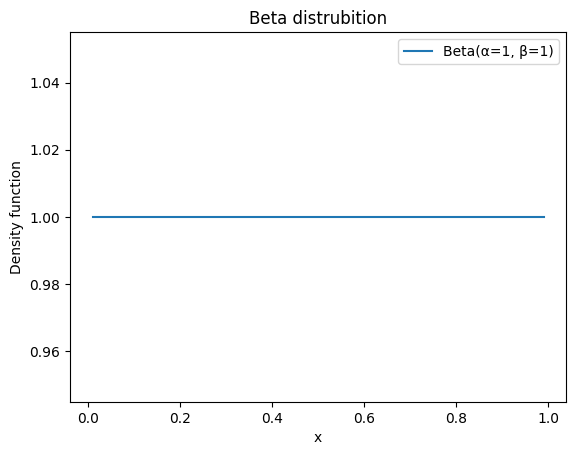

In [20]:
######################  TODO  ########################
plot_beta_dist(BetaDistribution(1,1))
######################  TODO  ########################

Now calculate the final posterior mean and variance.

C:\Users\L O Q\AppData\Local\Temp\ipykernel_7096\4006837094.py:30: RuntimeWarning: divide by zero encountered in log
  log_pdf = (self.alpha - 1) * np.log(x) + (self.beta - 1) * np.log(1 - x) - betaln(self.alpha, self.beta)


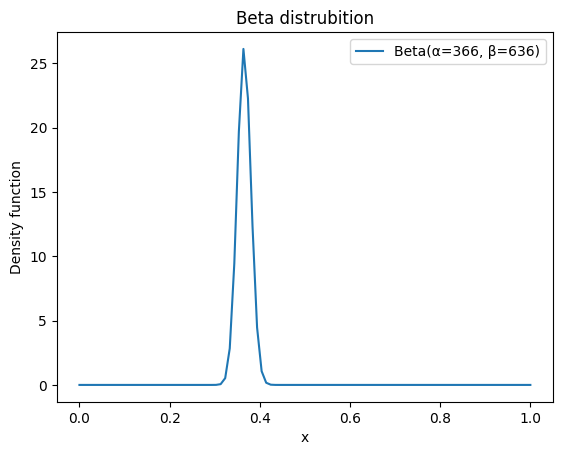

In [22]:
######################  TODO  ########################
def coin_flip (beta : BetaDistribution , data : list):
    head_count = 0
    tail_count = 0
    
    for i in range (0,1000):
        if data[i] == 'H':
            head_count +=1
        else:
            tail_count +=1

    updated_alpha = head_count
    updated_beta = tail_count 

    
    plot_beta_dist(BetaDistribution(beta.alpha+updated_alpha,beta.beta+updated_beta))


coin_flip(BetaDistribution(1,1) ,data)
######################  TODO  ########################

## Prior: $Beta(4, 10)$

C:\Users\L O Q\AppData\Local\Temp\ipykernel_7096\4006837094.py:30: RuntimeWarning: divide by zero encountered in log
  log_pdf = (self.alpha - 1) * np.log(x) + (self.beta - 1) * np.log(1 - x) - betaln(self.alpha, self.beta)


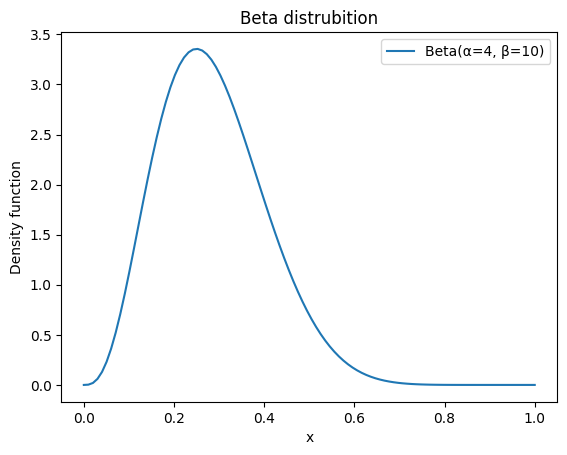

In [23]:
######################  TODO  ########################
plot_beta_dist(BetaDistribution(4,10))
######################  TODO  ########################

Now calculate the final posterior mean and variance.

C:\Users\L O Q\AppData\Local\Temp\ipykernel_7096\4006837094.py:30: RuntimeWarning: divide by zero encountered in log
  log_pdf = (self.alpha - 1) * np.log(x) + (self.beta - 1) * np.log(1 - x) - betaln(self.alpha, self.beta)


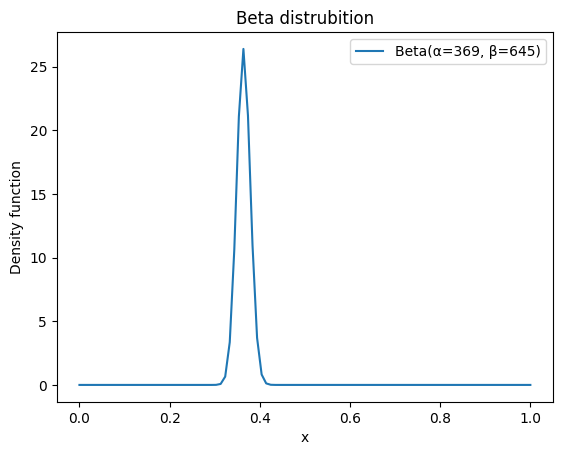

In [24]:
######################  TODO  ########################
coin_flip(BetaDistribution(4,10),data)
######################  TODO  ########################